[![Open in colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/phujbert/SceneGen/blob/master/visualize_dataset.ipynb)

In [1]:
from pycocotools.coco import COCO
import skimage.io as io
import matplotlib.pyplot as plt
import pycocotools.mask as mask_utils
from skimage.transform import resize as imresize
import numpy as np
import torch
from PIL import Image
import torchvision.transforms as T

In [2]:
data_type = 'val2017'
things_ann_file = 'coco_dataset/annotations/instances_{}.json'.format(data_type)
stuff_ann_file = 'coco_dataset/annotations/stuff_{}.json'.format(data_type)

In [3]:
coco = COCO(things_ann_file)
coco_stuff = COCO(stuff_ann_file)

loading annotations into memory...
Done (t=0.79s)
creating index...
index created!
loading annotations into memory...
Done (t=0.61s)
creating index...
index created!


# Visaualize COCO-STUff using cocostuffapi

In [4]:
image_id = coco.getImgIds()

In [5]:
image_id[0]

397133

In [6]:
img = coco.loadImgs(image_id[0])
img[0]['file_name']

'000000397133.jpg'

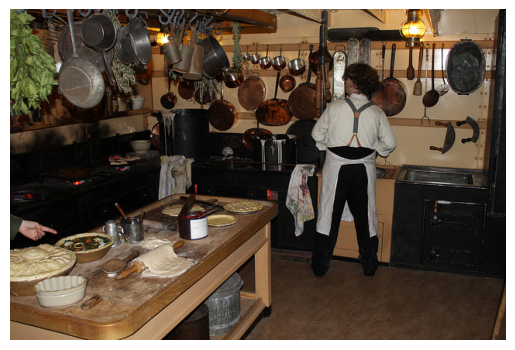

In [7]:
I = io.imread(img[0]['coco_url'])
plt.axis('off')
plt.imshow(I)
plt.show()

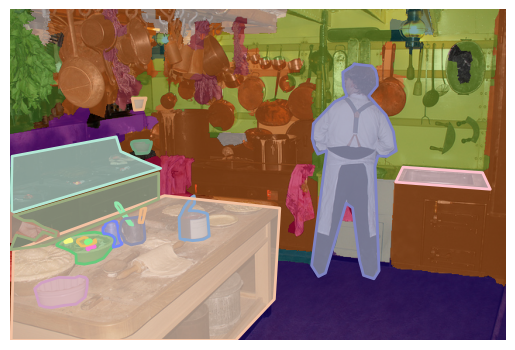

In [8]:
plt.imshow(I); plt.axis('off')
annIds = coco.getAnnIds(imgIds=img[0]['id'])
anns = coco.loadAnns(annIds)
stuff_ann_id = coco_stuff.getAnnIds(imgIds=image_id[0])
stuff_ann = coco_stuff.loadAnns(stuff_ann_id)
coco.showAnns(anns)
coco.showAnns(stuff_ann)

In [9]:
ann_id = coco.getAnnIds(imgIds=image_id[0])
ann = coco.loadAnns(ann_id)
ann[0]

{'segmentation': [[224.24,
   297.18,
   228.29,
   297.18,
   234.91,
   298.29,
   243.0,
   297.55,
   249.25,
   296.45,
   252.19,
   294.98,
   256.61,
   292.4,
   254.4,
   264.08,
   251.83,
   262.61,
   241.53,
   260.04,
   235.27,
   259.67,
   230.49,
   259.67,
   233.44,
   255.25,
   237.48,
   250.47,
   237.85,
   243.85,
   237.11,
   240.54,
   234.17,
   242.01,
   228.65,
   249.37,
   224.24,
   255.62,
   220.93,
   262.61,
   218.36,
   267.39,
   217.62,
   268.5,
   218.72,
   295.71,
   225.34,
   297.55]],
 'area': 1481.3806499999994,
 'iscrowd': 0,
 'image_id': 397133,
 'bbox': [217.62, 240.54, 38.99, 57.75],
 'category_id': 44,
 'id': 82445}

In [10]:
stuff_ann_id = coco_stuff.getAnnIds(imgIds=image_id[0])
stuff_ann = coco_stuff.loadAnns(stuff_ann_id)
len(stuff_ann)

14

# Visualize segmentation masks

In [11]:
def seg_to_mask(seg, width=1.0, height=1.0):
    if type(seg) == list:
        rles = mask_utils.frPyObjects(seg, height, width)
        rle = mask_utils.merge(rles)
    elif type(seg['counts']) == list:
        rle = mask_utils.frPyObjects(seg, height, width)
    else:
        rle = seg
    return mask_utils.decode(rle)

In [12]:
WW = len(I[0])
HH = len(I)

In [13]:
object_data = ann[1]
x, y, w, h = object_data['bbox']
x0 = x / WW
y0 = y / HH
x1 = (x + w) / WW
y1 = (y + h) / HH

In [14]:
mask = seg_to_mask(ann[1]['segmentation'], WW, HH)
mx0, mx1 = int(round(x)), int(round(x + w))
my0, my1 = int(round(y)), int(round(y + h))
mx1 = max(mx0 + 1, mx1)
my1 = max(my0 + 1, my1)
mask = mask[my0:my1, mx0:mx1]
#mask = imresize(255.0 * mask, (16, 16),
#                mode='constant')
#mask = torch.from_numpy((mask > 128).astype(np.int64))
mask = imresize(255.0 * mask, (16, 16),
                            mode='constant')
mask = torch.from_numpy((mask > 128).astype(np.int64))
mask

tensor([[0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0]])